<a href="https://colab.research.google.com/github/oopere/MachineLearningCourse/blob/main/MLCTFCatsvsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


let's start with TensorFlow.


---


In this collab, we are goig to solve three problems, and create thre different neuronal nets.


## First Sample. The most simple problem to solve 

---




In [ ]:
#First steep is import the libraries. 
import tensorflow as tf
#Numpy is a lybrary that allow us to work with arrays. 
import numpy as np
#keras is an open source neural networks lybrary writted in python that run's in varios frameworks, TensorFlow included. 
from tensorflow import keras
print (tf.__version__)


2.8.0


In [ ]:
#Model with just one dense layer, one neuron, and one input. This is the most simple model possible. 
model = tf.keras.Sequential(keras.layers.Dense(units=1, input_shape=[1]))


In [ ]:
#create 2 arrays, and the model must discover the relationship betwen the values. 
# (n * -1) + 2
X = np.array([-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype=float)
y = np.array([4.0, 3.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0], dtype=float)

In [ ]:
#compile and train the model.
#compile and indicate the optimezer and the model. By the moment we need to understand that this both functions are where the magic happens. 
#The optimizer is the function responsible to make a guess. 
#The loss function is responsible to indicate how accurated the guees is. 
#They try to be more accurated in each epoch
model.compile(optimizer="sgd", loss="mean_squared_error") 
model.fit(X, y, epochs=250)

Epoch 1/250
1/1 [==============================] - 0s 239ms/step - loss: 6.3385e-05
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 6.2090e-05
Epoch 3/250
1/1 [==============================] - 0s 6ms/step - loss: 6.0822e-05
Epoch 4/250
1/1 [==============================] - 0s 4ms/step - loss: 5.9580e-05
Epoch 5/250
1/1 [==============================] - 0s 5ms/step - loss: 5.8363e-05
Epoch 6/250
1/1 [==============================] - 0s 4ms/step - loss: 5.7171e-05
Epoch 7/250
1/1 [==============================] - 0s 5ms/step - loss: 5.6004e-05
Epoch 8/250
1/1 [==============================] - 0s 5ms/step - loss: 5.4860e-05
Epoch 9/250
1/1 [==============================] - 0s 5ms/step - loss: 5.3739e-05
Epoch 10/250
1/1 [==============================] - 0s 9ms/step - loss: 5.2642e-05
Epoch 11/250
1/1 [==============================] - 0s 5ms/step - loss: 5.1566e-05
Epoch 12/250
1/1 [==============================] - 0s 5ms/step - loss: 5.0514e-05
Epoch 13/25

In [ ]:
#expect something near -8. 
print(model.predict([10.0]))

[[-7.993168]]


# Working with Images
Dataset:
This dataset is really common and used in a los of samples and tutorials. 
https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

References: 

This is an amazing article, using Keras, but not with Tensorflow. I got a lot of information and inspiration from this articles. For sure that anyone able to follow this course can understand and get ideas. 

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

Maybe the best introduction to Machine Learning with tensorflow is the list from Laurence Moroney available in youtube. I get a lot from the video number 5, to create this sample. 
https://www.youtube.com/watch?v=nq7_ZYJPWf0&t=5s


As you can see all the aproches are similar, but not the same. Is easy to copy one model who works with the same dataset, but you must understand what are you doing and experiment by yourself. 

In [41]:
#First step is import the libraries. 
import tensorflow as tf
#Numpy is a lybrary that allow us to work with arrays. 
import numpy as np
#keras is an open source neural networks lybrary writted in python that run's in varios frameworks, TensorFlow included. 
from tensorflow import keras
from time import time

print (tf.__version__)


2.8.0


In [2]:
#obtain the data from microsoft.com
#the same dataset is available in kaggle but with a different organization
#https://www.kaggle.com/competitions/dogs-vs-cats/data

!wget --no-check-certificate \
https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip \-O /tmp/catsvsdogs.zip



--2022-05-25 18:25:54--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 88.221.40.237, 2a02:26f0:b200:3a0::e59, 2a02:26f0:b200:3aa::e59
Connecting to download.microsoft.com (download.microsoft.com)|88.221.40.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/catsvsdogs.zip’

/tmp/catsvsdogs.zip 100%[===================>] 786.67M   145MB/s    in 5.5s    

2022-05-25 18:26:00 (144 MB/s) - ‘/tmp/catsvsdogs.zip’ saved [824887076/824887076]



In [7]:
#unzip the data
import zipfile
cvr_zip_file = '/tmp/catsvsdogs.zip'
zipmem = zipfile.ZipFile(cvr_zip_file)
zipmem.extractall('/tmp/catsvsdogs')
zipmem.close()



In [21]:
#create the directory structure
import os

#we need a try block, because it fails when the directories already exist. 
try:
  os.mkdir('/tmp/datacvd')
  os.mkdir('/tmp/datacvd/train')
  os.mkdir('/tmp/datacvd/validation')
  os.mkdir('/tmp/datacvd/train/cats')
  os.mkdir('/tmp/datacvd/train/dogs')
  os.mkdir('/tmp/datacvd/validation/cats')
  os.mkdir('/tmp/datacvd/validation/dogs')
except:
  pass

In [22]:
#we need 4 datasets, two for training the model and two for validate or test the model. 
#to classify the images in this dataset we can move it from their original directories to 
#a new ones with the correct structure. 

from shutil import copyfile

#this array contents all the images to move/copy
imagesCats=[]
imagesDogs=[]

for imagename in os.listdir('/tmp/catsvsdogs/PetImages/Cat/'):
  imageCat = '/tmp/catsvsdogs/PetImages/Cat/' + imagename
  if (os.path.getsize(imageCat)) > 0:
    imagesCats.append(imagename)


for imagename in os.listdir('/tmp/catsvsdogs/PetImages/Dog/'):
  if (counterImage > maxImages):
    break
  imageDog = '/tmp/catsvsdogs/PetImages/Dog/' + imagename
  if (os.path.getsize(imageDog)) > 0:
    imagesDogs.append(imagename)




counterImage = 0
for imagename in imagesCats:
  if  counterImage < 2000:
    copyfile('/tmp/catsvsdogs/PetImages/Cat/' + imagename, '/tmp/datacvd/validation/cats/'+imagename)
  else:
    copyfile('/tmp/catsvsdogs/PetImages/Cat/' + imagename, '/tmp/datacvd/train/cats/'+imagename)
  counterImage +=1

counterImage = 0
for imagename in imagesDogs:
  if  counterImage < 2000:
    copyfile('/tmp/catsvsdogs/PetImages/Dog/' + imagename, '/tmp/datacvd/validation/dogs/'+imagename)
  else:
    copyfile('/tmp/catsvsdogs/PetImages/Dog/' + imagename, '/tmp/datacvd/train/dogs/'+imagename)
  counterImage +=1

print(len(os.listdir('/tmp/datacvd/validation/dogs/')))
print(len(os.listdir('/tmp/datacvd/train/dogs/')))
print(len(os.listdir('/tmp/datacvd/validation/cats/')))
print(len(os.listdir('/tmp/datacvd/train/cats/')))


2000
10500
2000
10500


In [23]:
#create the model
#it's a minimal model for images, with just an Convolutionatl layer and a MaxPooling layer
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 147, 147, 16)      784       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 85264)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               10913920  
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,914,833
Trainable params: 10,914,833
Non-trainable params: 0
__________________________________________

In [25]:
 #create the model
#a model with more convutionals and Pooling layers obtains leess parameters. 
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(32, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(64, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [26]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 147, 147, 16)      784       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 70, 70, 32)        8224      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)      

In [27]:
#compile models 
from tensorflow.keras.optimizers import RMSprop
#binary_crossentropy is a loss function that works really weel with binary clasifications. 
model.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])
model2.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [28]:
#preparing the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#TRAIN Dataset
#Normalize the images
train_idg = ImageDataGenerator(rescale=1/255)
train_data = train_idg.flow_from_directory(
    '/tmp/datacvd/train', 
    target_size = (150, 150), 
    batch_size = 105, 
    class_mode='binary'
)
#VALIDATION Dataset
val_idg = ImageDataGenerator(rescale=1/255)
val_data = val_idg.flow_from_directory(
    '/tmp/datacvd/validation', 
    target_size = (150, 150), 
    batch_size = 100, 
    class_mode='binary'
)

Found 20998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [29]:
#Training the model
#epochs * steps_per_epoch * batch_size

history = model.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)

Epoch 1/15
100/100 [==============================] - 36s 351ms/step - loss: 1.3770 - accuracy: 0.5859 - val_loss: 0.8535 - val_accuracy: 0.5300
Epoch 2/15
100/100 [==============================] - ETA: 0s - loss: 0.6053 - accuracy: 0.6879

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 35s 345ms/step - loss: 0.6053 - accuracy: 0.6879 - val_loss: 0.6763 - val_accuracy: 0.6475
Epoch 3/15
100/100 [==============================] - 35s 346ms/step - loss: 0.5378 - accuracy: 0.7403 - val_loss: 0.5536 - val_accuracy: 0.7255
Epoch 4/15
100/100 [==============================] - 34s 344ms/step - loss: 0.4641 - accuracy: 0.7893 - val_loss: 0.5787 - val_accuracy: 0.7285
Epoch 5/15
100/100 [==============================] - 35s 346ms/step - loss: 0.4170 - accuracy: 0.8137 - val_loss: 0.5722 - val_accuracy: 0.7225
Epoch 6/15
100/100 [==============================] - 35s 347ms/step - loss: 0.3583 - accuracy: 0.8517 - val_loss: 0.6730 - val_accuracy: 0.7000
Epoch 7/15
100/100 [==============================] - 35s 348ms/step - loss: 0.3145 - accuracy: 0.8739 - val_loss: 0.6003 - val_accuracy: 0.7315
Epoch 8/15
100/100 [==============================] - 35s 346ms/step - loss: 0.2594 - accuracy: 0.9007 - val_loss: 0.6679 - val_accuracy: 0.7

In [30]:
#Trianing the model2
history2 = model2.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)

Epoch 1/15
100/100 [==============================] - 37s 366ms/step - loss: 0.7873 - accuracy: 0.5530 - val_loss: 0.6664 - val_accuracy: 0.6100
Epoch 2/15
100/100 [==============================] - 35s 349ms/step - loss: 0.6450 - accuracy: 0.6413 - val_loss: 0.5710 - val_accuracy: 0.7005
Epoch 3/15
100/100 [==============================] - ETA: 0s - loss: 0.5687 - accuracy: 0.7036

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 35s 348ms/step - loss: 0.5687 - accuracy: 0.7036 - val_loss: 0.4892 - val_accuracy: 0.7665
Epoch 4/15
100/100 [==============================] - 35s 348ms/step - loss: 0.5172 - accuracy: 0.7423 - val_loss: 0.5476 - val_accuracy: 0.7315
Epoch 5/15
100/100 [==============================] - 35s 349ms/step - loss: 0.4757 - accuracy: 0.7765 - val_loss: 0.4912 - val_accuracy: 0.7665
Epoch 6/15
100/100 [==============================] - 34s 344ms/step - loss: 0.4498 - accuracy: 0.7895 - val_loss: 0.4667 - val_accuracy: 0.7915
Epoch 7/15
100/100 [==============================] - 35s 351ms/step - loss: 0.4078 - accuracy: 0.8127 - val_loss: 0.4365 - val_accuracy: 0.7955
Epoch 8/15
100/100 [==============================] - 35s 348ms/step - loss: 0.3758 - accuracy: 0.8302 - val_loss: 0.5917 - val_accuracy: 0.7295
Epoch 9/15
100/100 [==============================] - 35s 348ms/step - loss: 0.3395 - accuracy: 0.8510 - val_loss: 0.5623 - val_accuracy: 0.7

<Figure size 432x288 with 0 Axes>

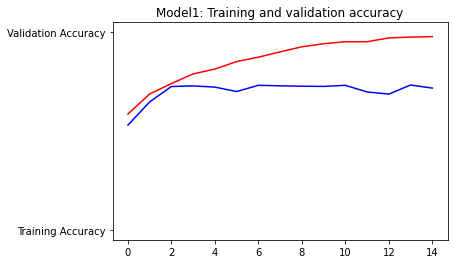

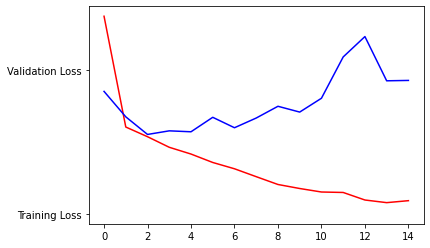

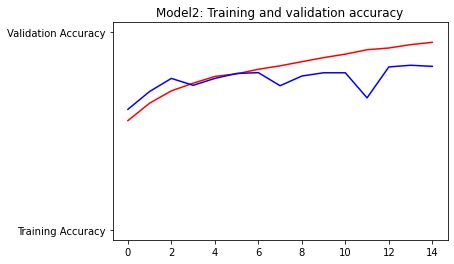

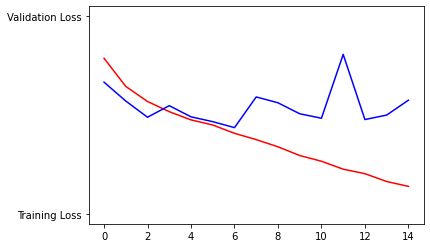

<Figure size 432x288 with 0 Axes>

In [31]:
%matplotlib inline
 
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

acc2=history2.history['accuracy']
val_acc2=history2.history['val_accuracy']
loss2=history2.history['loss']
val_loss2=history2.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Model1: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

plt.plot(epochs, acc2, 'r', "Training Accuracy")
plt.plot(epochs, val_acc2, 'b', "Validation Accuracy")
plt.title('Model2: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss2, 'r', "Training Loss")
plt.plot(epochs, val_loss2, 'b', "Validation Loss")
plt.figure()



## Solve OVERFITTING with Image Augmentation
Image augmentation add variations to the images reducing the overfitting. 





In [32]:
#preparing the images but using random movements to obtain images from 
#image augmentation applied only to train data generator. 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#TRAIN Dataset
#Normalize the images
train_idg = ImageDataGenerator(rescale=1/255, 
                               rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.2, 
                               zoom_range=0.1, 
                               horizontal_flip=True)
train_data = train_idg.flow_from_directory(
    '/tmp/datacvd/train', 
    target_size = (150, 150), 
    batch_size = 105, 
    class_mode='binary'
)
#VALIDATION Dataset
val_idg = ImageDataGenerator(rescale=1/255)
val_data = val_idg.flow_from_directory(
    '/tmp/datacvd/validation', 
    target_size = (150, 150), 
    batch_size = 100, 
    class_mode='binary'
)

Found 20998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [33]:
#Training the model
#with the new imagegenerator

history = model.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.6228 - accuracy: 0.6876

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 77s 774ms/step - loss: 0.6228 - accuracy: 0.6876 - val_loss: 0.6402 - val_accuracy: 0.6775
Epoch 2/15
100/100 [==============================] - 76s 765ms/step - loss: 0.5700 - accuracy: 0.7138 - val_loss: 0.5122 - val_accuracy: 0.7555
Epoch 3/15
100/100 [==============================] - 77s 769ms/step - loss: 0.5747 - accuracy: 0.7130 - val_loss: 0.5145 - val_accuracy: 0.7560
Epoch 4/15
100/100 [==============================] - 77s 767ms/step - loss: 0.5618 - accuracy: 0.7168 - val_loss: 0.5328 - val_accuracy: 0.7525
Epoch 5/15
100/100 [==============================] - 77s 769ms/step - loss: 0.5557 - accuracy: 0.7261 - val_loss: 0.5350 - val_accuracy: 0.7465
Epoch 6/15
100/100 [==============================] - 77s 769ms/step - loss: 0.5492 - accuracy: 0.7302 - val_loss: 0.5754 - val_accuracy: 0.7110
Epoch 7/15
100/100 [==============================] - 77s 767ms/step - loss: 0.5563 - accuracy: 0.7268 - val_loss: 0.4946 - val_accuracy: 0.7

In [35]:
#Trianing the model2
history2 = model2.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.4951 - accuracy: 0.7716

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 78s 777ms/step - loss: 0.4951 - accuracy: 0.7716 - val_loss: 0.4104 - val_accuracy: 0.8150
Epoch 2/15
100/100 [==============================] - 77s 772ms/step - loss: 0.4494 - accuracy: 0.7926 - val_loss: 0.3817 - val_accuracy: 0.8400
Epoch 3/15
100/100 [==============================] - 77s 775ms/step - loss: 0.4434 - accuracy: 0.7988 - val_loss: 0.3429 - val_accuracy: 0.8565
Epoch 4/15
100/100 [==============================] - 77s 770ms/step - loss: 0.4375 - accuracy: 0.8023 - val_loss: 0.3844 - val_accuracy: 0.8415
Epoch 5/15
100/100 [==============================] - 77s 770ms/step - loss: 0.4079 - accuracy: 0.8147 - val_loss: 0.3174 - val_accuracy: 0.8670
Epoch 6/15
100/100 [==============================] - 77s 772ms/step - loss: 0.4040 - accuracy: 0.8186 - val_loss: 0.3257 - val_accuracy: 0.8670
Epoch 7/15
100/100 [==============================] - 77s 770ms/step - loss: 0.3991 - accuracy: 0.8203 - val_loss: 0.3221 - val_accuracy: 0.8

<Figure size 432x288 with 0 Axes>

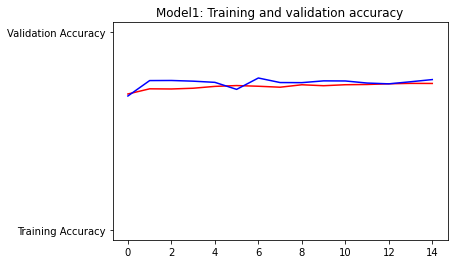

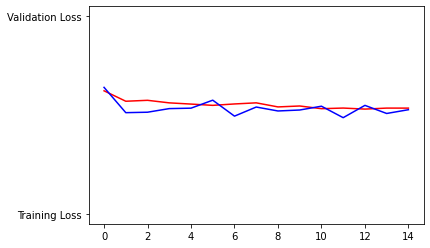

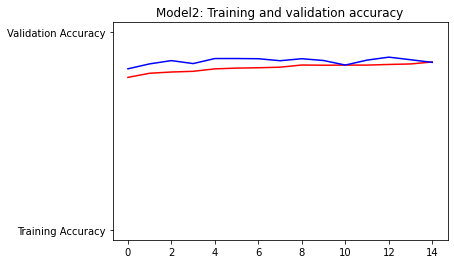

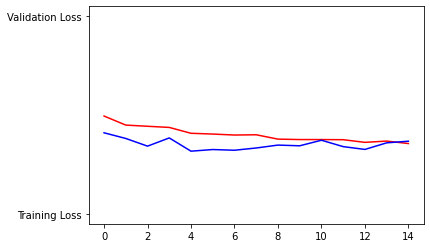

<Figure size 432x288 with 0 Axes>

In [36]:
%matplotlib inline
 
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

acc2=history2.history['accuracy']
val_acc2=history2.history['val_accuracy']
loss2=history2.history['loss']
val_loss2=history2.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Model1: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

plt.plot(epochs, acc2, 'r', "Training Accuracy")
plt.plot(epochs, val_acc2, 'b', "Validation Accuracy")
plt.title('Model2: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss2, 'r', "Training Loss")
plt.plot(epochs, val_loss2, 'b', "Validation Loss")
plt.figure()

### Add a some dropout layers to the models
A dropout layer can help with the overfitting reducing the amount of information in every image. 

In [37]:
#create the model with a dropout layer. 
#it's a minimal model for images, with just an Convolutionatl layer and a MaxPooling layer
modelDrop1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Dropout(0.5), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [38]:
 #create the model with dropouts layers. 
#a model with more convutionals and Pooling layers obtains leess parameters. 
modelDrop2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),   
  tf.keras.layers.Conv2D(32, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Conv2D(64, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Dropout(0.5), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [39]:
#compile the dropout models 
from tensorflow.keras.optimizers import RMSprop
#binary_crossentropy is a loss function that works really weel with binary clasifications. 
modelDrop1.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])
modelDrop2.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [40]:
#Training the model
#with the new imagegenerator

historyDrop = modelDrop1.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 1.1276 - accuracy: 0.5413

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 78s 776ms/step - loss: 1.1276 - accuracy: 0.5413 - val_loss: 0.6457 - val_accuracy: 0.6430
Epoch 2/15
100/100 [==============================] - 77s 765ms/step - loss: 0.6527 - accuracy: 0.6235 - val_loss: 0.6968 - val_accuracy: 0.5570
Epoch 3/15
100/100 [==============================] - 77s 772ms/step - loss: 0.6271 - accuracy: 0.6496 - val_loss: 0.5681 - val_accuracy: 0.7230
Epoch 4/15
100/100 [==============================] - 77s 768ms/step - loss: 0.6089 - accuracy: 0.6741 - val_loss: 0.5576 - val_accuracy: 0.7255
Epoch 5/15
100/100 [==============================] - 77s 768ms/step - loss: 0.6032 - accuracy: 0.6795 - val_loss: 0.5777 - val_accuracy: 0.6820
Epoch 6/15
100/100 [==============================] - 77s 773ms/step - loss: 0.5796 - accuracy: 0.6953 - val_loss: 0.5215 - val_accuracy: 0.7475
Epoch 7/15
100/100 [==============================] - 76s 765ms/step - loss: 0.5725 - accuracy: 0.6989 - val_loss: 0.5777 - val_accuracy: 0.6

In [42]:
#Trianing the model2
start = time()
historyDrop2 = model2.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)
print (time()-start)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.3556 - accuracy: 0.8462

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 78s 778ms/step - loss: 0.3556 - accuracy: 0.8462 - val_loss: 0.3307 - val_accuracy: 0.8570
Epoch 2/15
100/100 [==============================] - 77s 772ms/step - loss: 0.3426 - accuracy: 0.8539 - val_loss: 0.2883 - val_accuracy: 0.8780
Epoch 3/15
100/100 [==============================] - 84s 844ms/step - loss: 0.3586 - accuracy: 0.8410 - val_loss: 0.3075 - val_accuracy: 0.8760
Epoch 4/15
100/100 [==============================] - 80s 793ms/step - loss: 0.3405 - accuracy: 0.8514 - val_loss: 0.2904 - val_accuracy: 0.8770
Epoch 5/15
100/100 [==============================] - 78s 775ms/step - loss: 0.3368 - accuracy: 0.8559 - val_loss: 0.2961 - val_accuracy: 0.8815
Epoch 6/15
100/100 [==============================] - 78s 781ms/step - loss: 0.3359 - accuracy: 0.8571 - val_loss: 0.4564 - val_accuracy: 0.7920
Epoch 7/15
100/100 [==============================] - 77s 775ms/step - loss: 0.3289 - accuracy: 0.8611 - val_loss: 0.4597 - val_accuracy: 0.8

<Figure size 432x288 with 0 Axes>

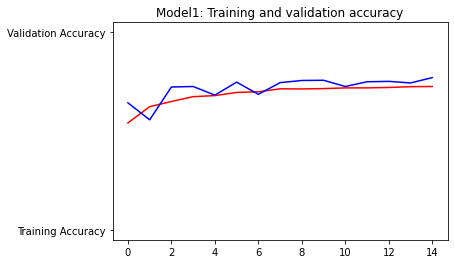

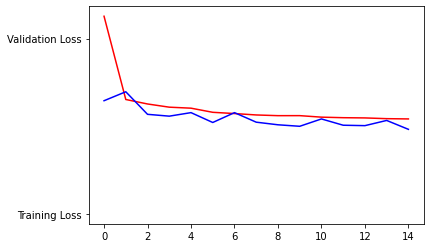

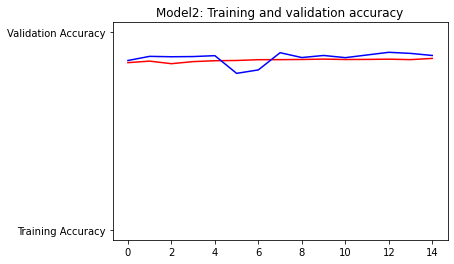

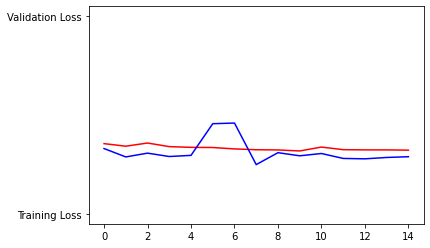

<Figure size 432x288 with 0 Axes>

In [43]:
%matplotlib inline
 
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=historyDrop.history['accuracy']
val_acc=historyDrop.history['val_accuracy']
loss=historyDrop.history['loss']
val_loss=historyDrop.history['val_loss']

acc2=historyDrop2.history['accuracy']
val_acc2=historyDrop2.history['val_accuracy']
loss2=historyDrop2.history['loss']
val_loss2=historyDrop2.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Model1: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

plt.plot(epochs, acc2, 'r', "Training Accuracy")
plt.plot(epochs, val_acc2, 'b', "Validation Accuracy")
plt.title('Model2: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss2, 'r', "Training Loss")
plt.plot(epochs, val_loss2, 'b', "Validation Loss")
plt.figure()